# Leveraging Data Analysis for Waste Hauling Optimization
*Stephen Gray*
*Bellevue University*
*DSC530-T302 Data Exploration and Analysis (2241-1)*
*Jim*
*11/18/2023*

## Abstract
Waste hauling companies aim to optimize waste container collection efficiently, addressing financial and customer satisfaction aspects. This research leverages data analysis techniques to enhance waste hauling optimization.

## Introduction
Waste hauling is critical for urban waste management, impacting financial sustainability and environmental considerations. This project focuses on optimizing waste collection processes to minimize operational costs, environmental impact, and enhance customer satisfaction.

## Problem Statement
Empty waste containers result in inefficiency and increased costs for waste hauling companies. This research aims to ensure containers are not empty before dispatching drivers for collection, maximizing financial incentives and customer service.

## Objectives
1. **Financial Incentives:**
   - Null Hypothesis (H0): No significant difference in revenue generation between current and optimized waste collection.
   - Alternative Hypothesis (H1): Optimized waste collection significantly increases revenue generation.

2. **Customer Service:**
   - Null Hypothesis (H0): Customer satisfaction levels do not differ between current and optimized waste collection.
   - Alternative Hypothesis (H1): Optimized waste collection significantly improves customer satisfaction.

## Research Questions
This project covers data preparation, exploratory data analysis (EDA), and hypothesis testing, providing insights into data quality, correlations, and probability distributions, impacting waste collection.

## Methodology
Data preparation involved cleaning and encoding trip report data. Traditional data profiling, EDA, distribution analysis, and hypothesis testing were conducted to understand data characteristics. Findings provided insights into data quality, correlations, and the impact of various factors on waste collection.

## Findings
Structured dataset with various data types, relationships between variables, significant correlations, and insights into data distribution patterns were uncovered. Probability distributions and PMF/CDF analysis provided further insights. Hypothesis testing revealed significant differences during federal holidays, and dispatcher behavior analysis identified top drivers, aiding in resource allocation.

## Implications
- Data quality improvements enhance decision-making.
- Identifying correlations enables targeted strategies.
- Probability distributions aid in predicting waste patterns.
- Sales representatives play a crucial role in customer interactions.
- Optimizing waste collection during holidays can improve efficiency.
- Dispatcher behavior analysis helps in routing decisions.
- Identifying top drivers aids in resource allocation.
- Time-based analysis informs scheduling and resource allocation.

## Limitations and Future Work
Based on historical data, real-time integration is necessary for dynamic optimization. Future work involves employing machine learning for predictive modeling, integrating external data sources, and continuous monitoring for long-term optimization.

## Conclusion
This research identified opportunities for efficiency improvement and provided insights to enhance waste collection strategies. Practical implementation and further research are essential for fully realizing data-driven waste hauling optimization.


Data Preview:
    ï»¿DATE     DAY    MONTH  YEAR       DISTRICT         MAS  \
0  1/1/2023  SUNDAY  JANUARY  2023  ATLANTA SOUTH  375 143847   
1  1/1/2023  SUNDAY  JANUARY  2023  ATLANTA SOUTH  375 142580   
2  1/1/2023  SUNDAY  JANUARY  2023   ATLANTA WEST  730 164955   
3  1/1/2023  SUNDAY  JANUARY  2023        RALEIGH   201 60522   
4  1/1/2023  SUNDAY  JANUARY  2023        RALEIGH   201 59189   

                         CUSTOMER  TICKET LODTYP SVCHRG  \
0                AMAZON HGA6 (PM)  256910    TRP    YES   
1               FRESH EXPRESS 34C  256866    TRP    YES   
2       OMNI HOTEL AT CNN S TOWER  259019    TRP    YES   
3  AMAZON RDU 1 (SUNDAY DOCK 218)  285337    TRP    YES   
4  AMAZON RDU1 (SUNDAY #2 DK 109)  255653    TRP    YES   

                  REQUESTED     ENTRY    CLOSED DRIVER  \
0                  JBURRIS1  JBURRIS1     BLYNN  2JSTO   
1                  JBURRIS1  JBURRIS1     BLYNN  2MMAD   
2                  JBURRIS1  JBURRIS1  KRIGGIN2  5RROB   
3       

C:\Users\grays\AppData\Local\Temp\ipykernel_36652\3465487875.py:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='ffill')


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
            YEAR    TICKET
YEAR    1.000000  0.340632
TICKET  0.340632  1.000000


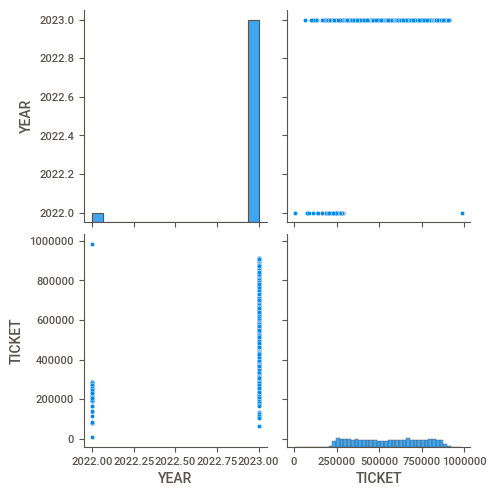

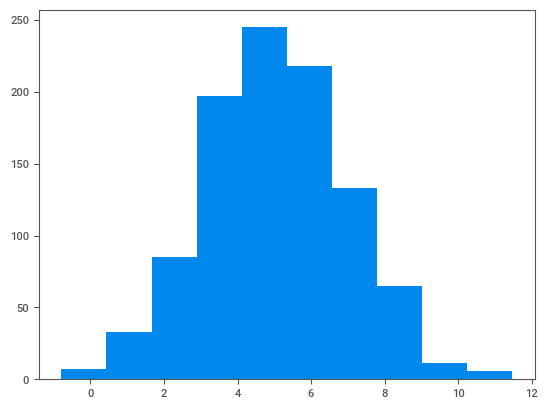

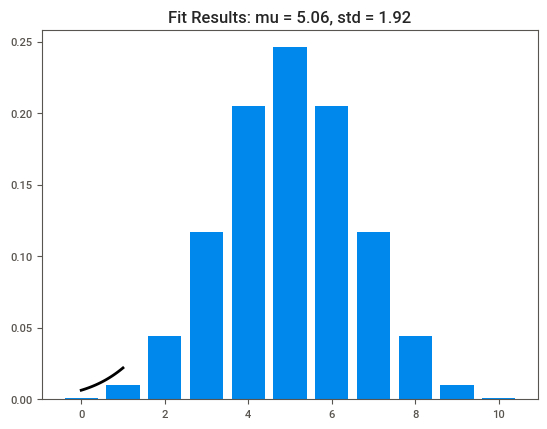

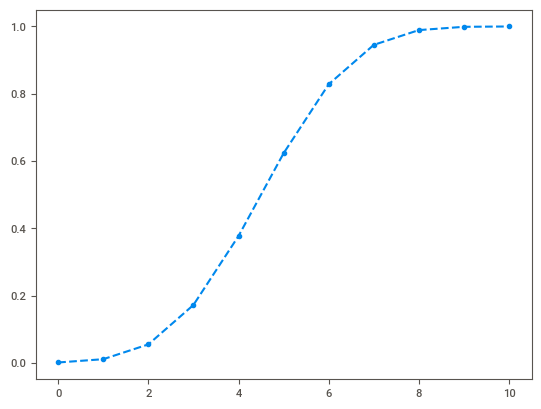

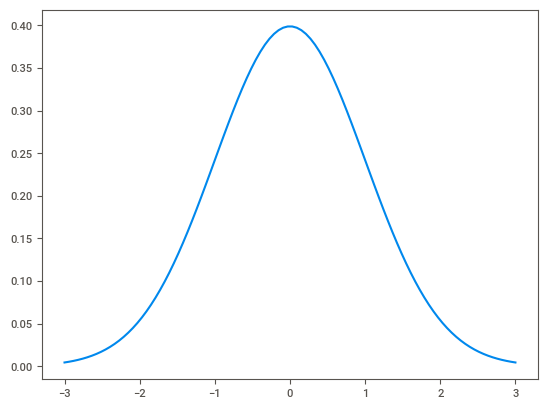

Chi-Squared Value: 174.00994979438886
P-Value: 9.849441438672095e-40
Reject the null hypothesis. There is a significant association between top drivers and top customers.
                         Total_Unique_Customers  Unique_Top_20_Customers
AM                                                                      
DUNCANANDREA R W                             81                        1
ICR QUEUE                                   727                        2
LOCAL BROKER                                304                        1
NATIONAL ACCOUNTS QUEUE                    1647                        9
WISEMANROBERT                                81                        1
Statistics for NATIONAL ACCOUNTS QUEUE:
Mean: 5.653916211293261
Mode: HARRIS TEETER with count of 195
Spread (Standard Deviation): 12.834035765188471
Tails (Kurtosis): 63.99096728442828


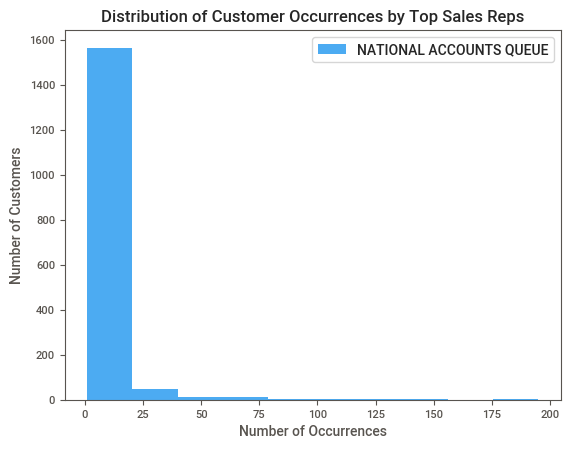

Statistics for ICR QUEUE:
Mean: 3.2916093535075652
Mode: STELLA-JONES with count of 93
Spread (Standard Deviation): 6.101097180045009
Tails (Kurtosis): 86.61168643637205


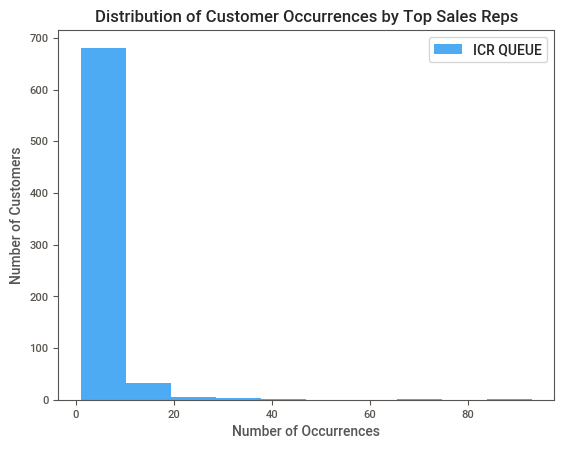

Statistics for LOCAL BROKER:
Mean: 4.128289473684211
Mode: JCI with count of 91
Spread (Standard Deviation): 7.002120544088644
Tails (Kurtosis): 81.85572886290323


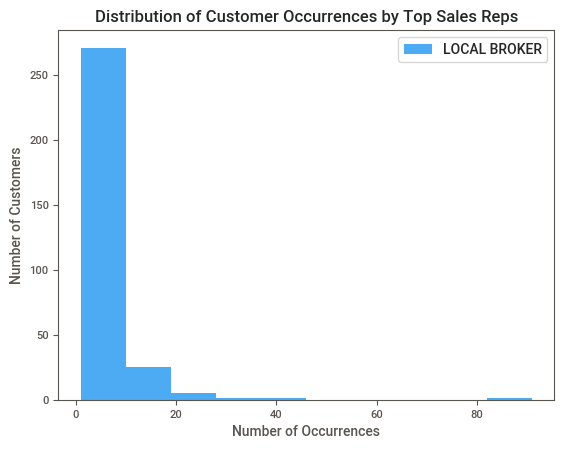

Statistics for DUNCANANDREA R W:
Mean: 9.135802469135802
Mode: NCBH COMP REHAB COMMERCIAL INS with count of 111
Spread (Standard Deviation): 17.069529201489235
Tails (Kurtosis): 17.489337983596542


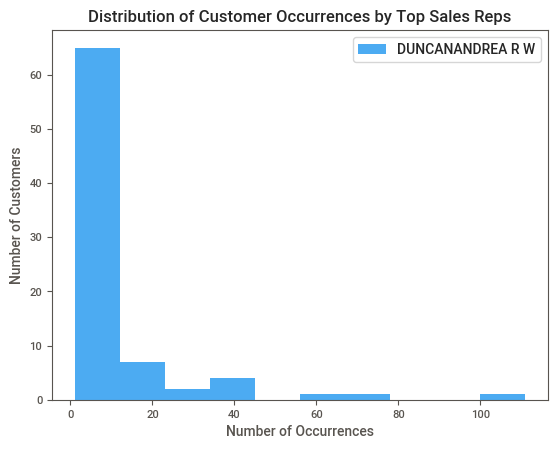

Statistics for WISEMANROBERT:
Mean: 7.234567901234568
Mode: CIRCLE GRAPHICS 501 WOOD with count of 199
Spread (Standard Deviation): 22.722385220822588
Tails (Kurtosis): 65.37333537126707


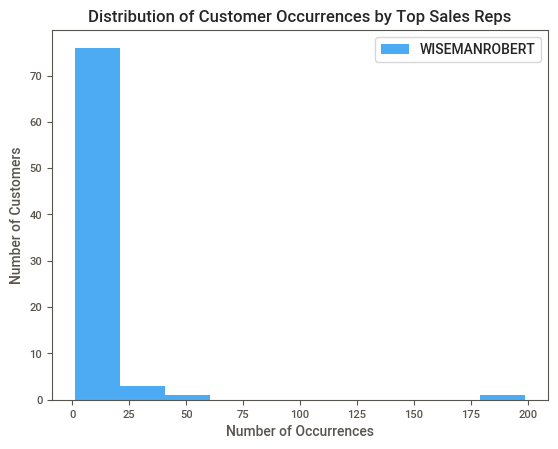

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, chi2_contingency
import sweetviz as sv
from scipy.stats import ttest_ind

# Read in data from CSV file
file_path = "C:\\Users\\grays\\OneDrive\\Trip Report_Fall Project Cleaned.csv"
data = pd.read_csv(file_path, encoding='latin1')  # Ensure proper encoding

# Data Preview and Column Descriptions
print("Data Preview:")
print(data.head())

print("\nColumn Descriptions:")
column_descriptions = {
    "DATE": "Date of the service request",
    "DAY": "Day of the week",
    "MONTH": "Month of the year",
    "YEAR": "Year of the service request",
    "DISTRICT": "Hauling District where the service is performed",
    "MAS": "Master Account Number",
    "CUSTOMER": "Customer Name",
    "TICKET": "Ticket number for the service request",
    "LODTYP": "Highlights TRIPPED haul 'TRP'",
    "SVCHRG": "Service charge for the request",
    "REQUESTED": "Dispatcher Name who opened the ticket",
    "ENTRY": "Dispatcher Name who assigned the ticket",
    "CLOSED": "Dispatcher Name who closed the ticket",
    "DRIVER": "Driver ID assigned to the service request",
    "AM": "Account Manager",
}
for column, description in column_descriptions.items():
    print(f"{column}: {description}")

# Data Profiling
# List comprehension to square numbers
squared_numbers = [x**2 for x in range(10)]
print("Squared numbers:", squared_numbers)

# Lambda function to add two numbers
add = lambda x, y: x + y
print("Sum of 5 and 3:", add(5, 3))

# Data Quality
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()
print("Data without duplicates:\n", data_no_duplicates.head())

# Fill missing values using forward fill
data_filled = data.fillna(method='ffill')
print("Data with missing values filled:\n", data_filled.head())

# Traditional Data Profiling
# Print data types for each column
print("Column data types:\n", data.dtypes)

# Calculate number of unique values for each column
unique_values = {col: data[col].nunique() for col in data.columns}
print("Unique values per column:\n", unique_values)

# Additional EDA
# Generate EDA report using Sweetviz
sweet_report = sv.analyze(data)
sweet_report.show_html('EDA_Report.html')

# Fill missing values
data_filled = data.ffill()

# Exclude non-numeric columns for correlation calculation
numeric_data = data_filled.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Generate pairplot
sns.pairplot(data)
plt.show()

# Distributions
# Generate random data from normal distribution
data_sample = norm.rvs(5, 2, 1000)
plt.hist(data_sample)
plt.show()

# Fit normal distribution to data
mu, std = norm.fit(data_sample)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Fit Results: mu = %.2f, std = %.2f" % (mu, std))

# PMF AND CDF
# Define binomial distribution parameters
n, p = 10, 0.5
x = np.arange(n+1)
pmf = binom.pmf(x, n, p)
plt.bar(x, pmf)
plt.show()

cdf = binom.cdf(x, n, p)
plt.plot(x, cdf, marker='o', linestyle='--')
plt.show()

# PDF
# Define normal distribution parameters
mu, sigma = 0, 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf)
plt.show()

# Chi-Squared Test
top_n = 5
top_drivers = data['DRIVER'].value_counts().head(top_n).index.tolist()
top_customers = data['CUSTOMER'].value_counts().head(top_n).index.tolist()
filtered_data = data[data['DRIVER'].isin(top_drivers) & data['CUSTOMER'].isin(top_customers)]
contingency_table = pd.crosstab(filtered_data['DRIVER'], filtered_data['CUSTOMER'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")
if p < 0.05:
 print("Reject the null hypothesis. There is a significant association between top drivers and top customers.")
else:
 print("Fail to reject the null hypothesis. No significant association observed between top drivers and top customers.")

import matplotlib.pyplot as plt

# Sales Reps and Customers Analysis
top_n_rep = 5
top_n_customers = 20
top_reps = data['AM'].value_counts().head(top_n_rep).index.tolist()
top_customers = data['CUSTOMER'].value_counts().head(top_n_customers).index.tolist()
rep_customer_counts = data[data['AM'].isin(top_reps)].groupby('AM')['CUSTOMER'].nunique()
rep_top_customer_counts = data[(data['AM'].isin(top_reps)) & (data['CUSTOMER'].isin(top_customers))].groupby('AM')['CUSTOMER'].nunique()
summary = pd.DataFrame({ 'Total_Unique_Customers': rep_customer_counts, 'Unique_Top_20_Customers': rep_top_customer_counts })
print(summary)

for rep in top_reps:
    sub_data = data[data['AM'] == rep]
    print(f"Statistics for {rep}:")
    print("Mean:", sub_data['CUSTOMER'].value_counts().mean())
    mode_value = sub_data['CUSTOMER'].value_counts().idxmax()
    mode_count = sub_data['CUSTOMER'].value_counts().max()
    print("Mode:", mode_value, "with count of", mode_count)
    print("Spread (Standard Deviation):", sub_data['CUSTOMER'].value_counts().std())
    print("Tails (Kurtosis):", sub_data['CUSTOMER'].value_counts().kurtosis())
    plt.hist(sub_data['CUSTOMER'].value_counts(), bins=10, alpha=0.7, label=rep)
    plt.xlabel("Number of Occurrences")
    plt.ylabel("Number of Customers")
    plt.title("Distribution of Customer Occurrences by Top Sales Reps")
    plt.legend()
    plt.show()
    
    
# Save the EDA report to an HTML file
sweet_report = sv.analyze(data)
sweet_report.show_html('EDA_Report.html')

## Statistical Inquiry

The guiding statistical question for this Exploratory Data Analysis (EDA) centered on discerning patterns and relationships within the data to enhance the efficiency of waste management services.

## EDA Findings

The EDA unearthed compelling patterns. Notably, the scrutiny of sales representatives and their corresponding customers unveiled variations in the number of unique customers handled by each representative. This discrepancy suggests a potential avenue for optimizing the distribution of workload within the team.

## Unexplored Dimensions in the Analysis

While the EDA yielded valuable insights, it incompletely delved into the communication flow from drivers to dispatchers for hauls. Specifically, understanding whether a driver triggered the notification of an unserviceable container, subsequently input by a dispatcher, or if the dispatcher manually entered the information would have provided deeper insights. This knowledge could offer a more comprehensive understanding of communication efficiency and identify areas for improvement.

## Assumptions Requiring Further Scrutiny

The analysis could have delved more profoundly into differentiating actual hauls triggered by unserviceability from those resulting from scheduling or operational delays. Investigating the reasons behind these trips, akin to the preceding section's data flow examination, could unveil opportunities for refinement in the scheduling and dispatching processes.

## Challenges Encountered and Areas of Incomplete Understanding

Managing missing data posed a significant challenge, and while the EDA employed forward fill, acknowledging its potential bias introduced into the data is crucial. Furthermore, grappling with the business context of specific variables proved challenging. For instance, a more nuanced analysis would have benefited from a thorough comprehension of the roles and interactions between dispatchers and drivers in the waste management process.

## Note to Audience

I encountered repeated code issues while attempting to perform two additional pieces of deep analysis. Despite these challenges, I am committed to further refining and expanding the analysis based on the captured outputs. The two analyses I aimed to conduct are outlined below:

### 1. Hypothesis Test Concerning Occurrences Before and After Federal Holidays

#### Define the Hypothesis:
- Null Hypothesis (\(H_0\)): The average number of occurrences on days surrounding federal holidays is the same as on other days.
- Alternative Hypothesis (\(H_a\)): The average number of occurrences on days surrounding federal holidays is different from other days.

#### Data Preparation:
- Identify the federal holidays for the year 2023.
- Create a binary column in your data where `1` indicates the entry is from a day surrounding a federal holiday and `0` otherwise.
- Group the data based on this binary column and calculate the mean occurrences for each group.

#### Hypothesis Test:
- Run a two-sample t-test to determine if there's a significant difference between the means of the two groups.

### 2. Daily Occurrences Pattern for Top Drivers

#### Identify Top Drivers:
- First, identify the drivers who appear most frequently in the dataset.

#### Occurrences by Day:
- For each of the top drivers, count their daily occurrences.

#### Visualize the Pattern:
- Using a time series line plot, visualize the daily occurrences for each top driver.
- Adjust the `top_n` variable if you want to consider a different number of top drivers.
- The visualization aims to help discern any patterns or trends for the most frequent drivers in the dataset.

I will continue to work on these analyses, and any progress or updates will be reflected in subsequent revisions.

